In [ ]:
! pip install transformers

%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.8.0


## Fine-tuning BERT
- BERT Pre-Training phase: Masked Language Model(MLM) and Next Sentence Prediction(NSP) 

- Then, finetune all of the weights in the pretrained model for a task of choice.

- Source: https://arxiv.org/pdf/1810.04805.pdf

<img src="https://i.imgur.com/fKNAhKH.png" alt=" " width="75%" height="75%">



##  QuestionAnswering Model (inbuilt)
- Pretraining(NSP, MLM) + SQuAD Dataset trained model
- Extractive Model
- SQuAD: https://rajpurkar.github.io/SQuAD-explorer/

- "SQuAD2.0 combines the 100,000 questions in SQuAD1.1 with over 50,000 unanswerable questions written adversarially by crowdworkers to look similar to answerable ones. To do well on SQuAD2.0, systems must not only answer questions when possible, but also determine when no answer is supported by the paragraph and abstain from answering."



In [ ]:
# Using HuggingFace's QuestionAnsweringModel (inbuilt)

import tensorflow as tf

# Refer: https://huggingface.co/transformers/model_doc/bert.html

from transformers import BertTokenizer, TFBertForQuestionAnswering 

modelName = 'bert-large-uncased-whole-word-masking-finetuned-squad' # https://huggingface.co/transformers/pretrained_models.html
 
tokenizer = BertTokenizer.from_pretrained(modelName)
model = TFBertForQuestionAnswering.from_pretrained(modelName)

print(model)

All model checkpoint layers were used when initializing TFBertForQuestionAnswering.

All the layers of TFBertForQuestionAnswering were initialized from the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForQuestionAnswering for predictions without further training.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Why eat plant-based meats.csv")
df.rename(columns={'transcript':'text'}, inplace=True)
df_text = df.copy()

In [ ]:
df.columns

Index(['Campaign', 'question', 'ID', 'text'], dtype='object')

In [ ]:
def remove_whitespace(text):
    return  " ".join(text.split())



In [ ]:
df_text['text']=df['text'].apply(remove_whitespace)

In [ ]:
!pip install pyspellchecker

In [ ]:
from spellchecker import SpellChecker
def spell_check(text):
    text = text.split()
    result = []
    spell = SpellChecker()
    for word in text:
        correct_word = spell.correction(word)
        result.append(correct_word)
    result = ' '.join(result)
    return result

#Test

df_text['text'] = df_text['text'].apply(spell_check)

In [ ]:

import regex as re
def decontracted(phrase):
  # specific
  phrase = re.sub(r"won't", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)

  # general
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)
  return phrase

sent = "i can't go"
decontracted(sent)
#use of back slash in re

#Test
df_text['text'] = df_text['text'].apply(decontracted)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

en_stopwords = stopwords.words('english')

def remove_stopwords(text):
    text = text.split()
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)
    result = ' '.join(result)       
    return result

#Test
df_text['text'] = df_text['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [ ]:
df_text.text.head()

0    I eat plant-based meats personal health reason...
1    okay So main reason excuse I plant-based meats...
2    So since I learned process making meat contrib...
3    I eat plant-based meats I vegetarian And plant...
4    I eat plant-based meats I wanted try something...
Name: text, dtype: object

In [ ]:
"""import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag

def lemmatization(text):
    text = text.split()
    result=[]
    wordnet = WordNetLemmatizer()
    for token,tag in pos_tag(text):
        pos=tag[0].lower()
        
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
            
        result.append(wordnet.lemmatize(token,pos))
    result = ' '.join(result)
    return result

#Test
df_text['text']=df_text['text'].apply(lemmatization)"""

"import nltk\nnltk.download('averaged_perceptron_tagger')\nimport nltk\nnltk.download('wordnet')\nfrom nltk.stem import WordNetLemmatizer\nfrom nltk import word_tokenize,pos_tag\n\ndef lemmatization(text):\n    text = text.split()\n    result=[]\n    wordnet = WordNetLemmatizer()\n    for token,tag in pos_tag(text):\n        pos=tag[0].lower()\n        \n        if pos not in ['a', 'r', 'n', 'v']:\n            pos='n'\n            \n        result.append(wordnet.lemmatize(token,pos))\n    result = ' '.join(result)\n    return result\n\n#Test\ndf_text['text']=df_text['text'].apply(lemmatization)"

In [ ]:
df_text.text.head()

0    I eat plant-based meats personal health reason...
1    okay So main reason excuse I plant-based meats...
2    So since I learned process making meat contrib...
3    I eat plant-based meats I vegetarian And plant...
4    I eat plant-based meats I wanted try something...
Name: text, dtype: object

In [ ]:
"""from nltk.stem import PorterStemmer

def stemming(text):
    text = text.split()
    porter = PorterStemmer()
    
    result=[]
    for word in text:
        result.append(porter.stem(word))
    result = ' '.join(result)
    return result

#Test
df_text['text']=df_text['text'].apply(stemming)
df_text.text.head()"""

"from nltk.stem import PorterStemmer\n\ndef stemming(text):\n    text = text.split()\n    porter = PorterStemmer()\n    \n    result=[]\n    for word in text:\n        result.append(porter.stem(word))\n    result = ' '.join(result)\n    return result\n\n#Test\ndf_text['text']=df_text['text'].apply(stemming)\ndf_text.text.head()"

In [ ]:
import numpy as np

In [ ]:
question = r"""Why do you eat plant-based meat?"""#r“Why do you eat plant-based meat?”

def batch_of_inputs(data_frame):
  batch = []
  for index, row in data_frame.iterrows():
    #print("hu")
    text = row['text']
    #print(text)
    input_text = "[CLS] " + question + " [SEP] " + text + " [SEP]"
    input_ids = tokenizer.encode(input_text)
    input_tokens = tokenizer.convert_ids_to_tokens(input_ids)
    input = tf.constant(input_ids)[None, :]
    token_type_ids = [0 if i <= input_ids.index(102) else 1 for i in range(len(input_ids))]
    answer = model(input,token_type_ids = tf.convert_to_tensor([token_type_ids])).values()
    #input_tokens = tokenizer.decode(input_ids)
    startScores, endScores = answer
    start_idx = tf.math.argmax(startScores[0],0).numpy()
    end_idx = tf.math.argmax(endScores[0],0).numpy() + 1
    ans_seq = " ".join(input_tokens[start_idx : end_idx])
    batch.append(ans_seq)
  data_frame['topics'] = batch
  return batch
    
  

In [ ]:
k=batch_of_inputs(df)
k = [ re.sub(r" ##","",st) for st in k]
k

['personal health reasons',
 'out of taste',
 "because it ' s better for the environment",
 "because i ' m a vegetarian",
 'because i wanted to try something new',
 "it ' s a really good alternative",
 '',
 'because i love animals',
 'environmental and animal welfare reasons',
 'grew up eating them',
 'health reasons',
 'because of the taste',
 '',
 'trying to substitute , substitute out a meat for any reason , as of like health',
 'provides a great substitute for me',
 'for environmental sustainability',
 'because my family is culturally traditionally vegetarian',
 'for animal welfare',
 "because i ' ve known someone who eats plant - based products",
 'environmental',
 'my mom growing up',
 'vegetarian',
 'advertising',
 'it seemed to taste',
 'one of my roommates is actually vegetarian',
 'for my health reasons for the taste and for animal welfare',
 'it uses so much less water',
 'because of the taste . i like how it tastes and that you can make them taste like real meat . also , an

In [ ]:
q=batch_of_inputs(df_text)
q = [ re.sub(r" ##","",st) for st in q]
q

['personal health reasons',
 'taste',
 'global warming',
 'finally give opportunity eat places otherwise would vegetarian choices allows actually go friends enjoy time plant based meats also great way finally experience appeal everyone loves also i vegetarian i believe i animal cruelty',
 'i wanted try something new',
 'want transition vegetarian diet',
 'it makes healthier makes feel better',
 'i love animals',
 'environmental animal welfare',
 '',
 'health reasons hormonal problems potential diagnosis cost and i switched diet one reasons kept plant - based diet course animal welfare',
 'taste i think brands create really good products taste really good and feel know smell like stink comes eating like original meat another big reason animal welfare',
 'pressure i would fit better',
 'health',
 'environmental impact',
 'environmental sustainability',
 'family culturally traditionally vegetarian',
 'animal welfare',
 '',
 'environmental',
 'my mom growing',
 'vegetarian',
 'something li

I am performing data augmentation in the collected answers and not in actual documents. Why?
As most augmentation techniques replace words with synonyms or add adverb/adjective but donot lead in change in the semantic meaning and so augmenting documents will increase the number of documents however the answers will be more like the same as obtained here.
So, I found it better to augment the answers obtained, so that umap and hdbscan get to see more words.

In [ ]:
q[9], q[18] 
#some answers are just okay but not really accurate once you read the actual answer.

('', '')

In [ ]:
print([i for i,j in enumerate(q) if j == ""])
print([i for i,j in enumerate(k) if j == ""])
print(df.text[6])
print(df.text[12])

#q[9] = "tastes good"
#q[18] ="not interested"

[9, 18]
[6, 12]
Hello there. My name is Guinea Hora, and I've been a vegetarian for almost three years now. I became a vegetarian for several reasons. One of which is for environmental sustainability and animal cruelty related reasons. I was horrified by how we treated animals and brutally killed them and sent them in meatpacking industries. And,  I just thought it would be more sustainable if I became a vegetarian. I also became one because I like the taste of plant-based meats better. It just makes it just more healthier and it makes me feel better to eat. So those are a couple of reasons of why I switched. Thank you. 

I usually eat a lot of normal meat. And the only time I choose to eat meat, that is plant-based is when I'm with other people who are eating meat, that is plant-based because I either one want to support them in their meal choices or two, I just feel not pressure, but that I would fit in better. If I also ate a plant-based meat food period. I know it is better for the

In [ ]:
for ind, i,j in zip(range(len(q)),q,k):
  if i=="" and j != "":
    print(i)
    print(j)
    q[ind] = j
    print(i)
  elif i !="" and j =="":
    k[ind] = i
  else:
    pass


grew up eating them


because i ' ve known someone who eats plant - based products



In [ ]:
print([i for i,j in enumerate(q) if j == ""])
print([i for i,j in enumerate(k) if j == ""])

[]
[]


In [ ]:
q_cleaned = [ decontracted(i) for i in q ]

In [ ]:
!pip install textattack
!pip install tensorflow-text


  Using cached importlib_metadata-3.10.1-py3-none-any.whl (14 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


  Using cached importlib_metadata-4.11.3-py3-none-any.whl (18 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.1
    Uninstalling importlib-metadata-3.10.1:
      Successfully uninstalled importlib-metadata-3.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
konoha 4.6.5 requires importlib-metadata<4.0.0,>=3.7.0, but you have importlib-metadata 4.11.3 which is incompatible.


#Reasson for text augmentation:
Originally had very less data and performing hdbcan clustering was givinng only 2 clusters which were not that bad:
One was clearly different from another given that 1st cluster had more words like 'I','my roommate','personal well-being'
and 2nd cluster had words pertaining to higher issues than individualistic predispositions, like "ethical",'animal welfare','environment','health'

But, I decided to do augmentation so that more number of words can be seen by our model for clustering

In [ ]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter,EasyDataAugmenter, CLAREAugmenter
def text_augmentation(lst_of_text):
  new_lst_text = []
  for doc in lst_of_text:
    #print(doc)
    wordnet = WordNetAugmenter().augment(doc)
    #print(wordnet)
    embed = EmbeddingAugmenter().augment(doc)
    #print(embed)
    easy = EasyDataAugmenter().augment(doc)
    #print("easy",easy)
    new_lst_text.extend(wordnet+embed+easy+[doc])
  return new_lst_text

In [ ]:
q_aug = text_augmentation(q_cleaned)
len(q_aug)

215

In [ ]:
type(q), type(q_aug)

(list, list)

##Using pretrained w2v model to get embeddings for document.
##w2v gives word embedding and a mean can be found from the corresponding embeddings of all the words present in a document and that is used as vector representation of the document


In [ ]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

In [ ]:
import gensim

def document_vector(doc):
    # remove out-of-vocabulary words
    doc = doc.split()
    doc = [word for word in doc if word in wv.vocab]
    try:
      meanwv = np.mean(wv[doc], axis=0)
      return meanwv
    except ValueError:
      return "hii" # just kind of hack to get indices of the documents who had no word indentified by word2vec model
    


#df_text['topic']=df_text['topic'].apply(document_vector)

In [ ]:
batch = []
invalid = []
for i,j in enumerate(q_aug):
  res = document_vector(j)
  if res!="hii":
    batch.append(res)
  else:
    invalid.append(i)

  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [ ]:
q_aug[invalid[0]]

'gustation'

In [ ]:
batch_ar = np.array(batch)
batch_ar.shape

(214, 300)

In [ ]:
!pip install hdbscan
!pip install umap-learn

#Potential techniques for modelling topics/texts: LDA, Kmeans but they want a priori knowledge of k(the number of clusters).
##However, for this task also, Kmeans could be tried with changing values of k and then silhouttte coefficient could help to determine the right value of k.

##Here, hdbscan is being used for clustering task, which has only one parameter, minimum number of samples.
##peforming directly on text embeddings, it was labeling each point as noise. It was mainly because of high dimensional nature of text data(300 d here). 
##So, first we need to reduce the dimensionality for which UMAP is being used



In [ ]:
import hdbscan

import umap
def form_clusters(doc_embeddings,
                      n_neighbors,
                      n_components, 
                      min_cluster_size,
                      random_state = None):
    """
    Forms HDBSCAN clusters after reducing embedding dimensionality with UMAP
    """
    
    umap_data = (umap.UMAP(n_neighbors=n_neighbors, 
                                n_components=n_components, 
                                metric='cosine', 
                                random_state=random_state)
                            .fit_transform(doc_embeddings))

    clusters = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size,
                               metric='euclidean', 
                               cluster_selection_method='eom').fit(umap_data)

    return clusters

#note that hdbscan is soft clustering algorithm . That is for a data point belonging to a cluster , it assigns a score for that.
##The noise points are assigned 0 score.
## So, using probability score, I have writtten a cost function.
The logic is that if a datapoint X belongs to a cluster c1 with score 2%, that is the situation we would like to avoid. 
Based on this and cut off as 5% a cost function is written below which is self-explanable.


credits: https://towardsdatascience.com/how-to-cluster-in-high-dimensions-4ef693bacc6

In [ ]:
#courtesy : https://towardsdatascience.com/how-to-cluster-in-high-dimensions-4ef693bacc6
def score_clusters(clusters, prob_threshold = 0.05):
    """
    Returns the number of clusters formed and cost of a given cluster supplied from running hdbscan
    """

    num_of_clusters = len(np.unique(clusters.labels_))
    total_num= len(clusters.labels_)
    cost = (np.count_nonzero(clusters.probabilities_ < prob_threshold)/total_num)
    
    return num_of_clusters, cost

In [ ]:
import random
def random_search(embeddings, space, num_evals):
    """
    Randomly search hyperparameter space and limited number of times 
    and return a summary of the results
    """
    
    results = []
    
    for i in range(num_evals):
        n_neighbors = random.choice(space['n_neighbors'])
        n_components = random.choice(space['n_components'])
        min_cluster_size = random.choice(space['min_cluster_size'])
        
        clusters = form_clusters(embeddings, 
                                     n_neighbors = n_neighbors, 
                                     n_components = n_components, 
                                     min_cluster_size = min_cluster_size, 
                                     random_state = 42)
    
        label_count, cost = score_clusters(clusters, prob_threshold = 0.05)
                
        results.append([i, n_neighbors, n_components, min_cluster_size, 
                        label_count, cost])
    
    result_df = pd.DataFrame(results, columns=['run_id', 'n_neighbors', 'n_components', 
                                               'min_cluster_size', 'label_count', 'cost'])
    
    return result_df.sort_values(by='cost')

In [ ]:
space = {
    "n_neighbors" : range(12,16),
    "n_components" : range(3,7),
    "min_cluster_size" : range(2,16),
    "random_state" : 42
}

random_use = random_search( batch_ar, space, 100 )

#results of random search can vary and the values used here were at the time of solving this assignment.
If you wish, change them accordingly

In [ ]:
pd.set_option('display.max_rows', 100)
random_use

,run_id,n_neighbors,n_components,min_cluster_size,label_count,cost
2,2,15,6,6,21,0.000000
69,69,14,6,5,21,0.000000
90,90,12,5,4,24,0.000000
71,71,13,6,5,22,0.000000
16,16,12,5,4,24,0.000000
8,8,12,5,4,24,0.000000
95,95,13,6,5,22,0.000000
11,11,13,4,4,23,0.000000
29,29,12,5,6,24,0.004673
28,28,14,6,6,22,0.004673


In [ ]:
random_use.columns
random_use[(random_use.cost>=0.032710)]

,run_id,n_neighbors,n_components,min_cluster_size,label_count,cost
55,55,13,3,11,7,0.065421
47,47,13,3,12,7,0.065421
85,85,12,5,9,7,0.065421
75,75,12,5,8,7,0.065421
73,73,13,3,9,7,0.065421
68,68,13,3,9,7,0.065421
0,0,12,5,8,7,0.065421
33,33,12,5,10,7,0.065421
12,12,13,3,11,7,0.065421
31,31,13,3,10,7,0.065421


In [ ]:
clusters = form_clusters(batch_ar,n_neighbors=15, n_components=6, min_cluster_size=6, random_state=42)

In [ ]:
q_aug_dup = q_aug
for i in invalid: # invalid contains indices of q_aug which had no doc representation (given than unavailaibility of the word in w2v model)
  del q_aug_dup[i]
q_aug_dup = np.array(q_aug_dup)
q_aug_dup.shape

(213,)

In [ ]:
for i in range(23):
  print("array for {}th cluster\n".format(i),q_aug_dup[clusters.labels_==i]) # it is excessively related to health 

IndexError: ignored

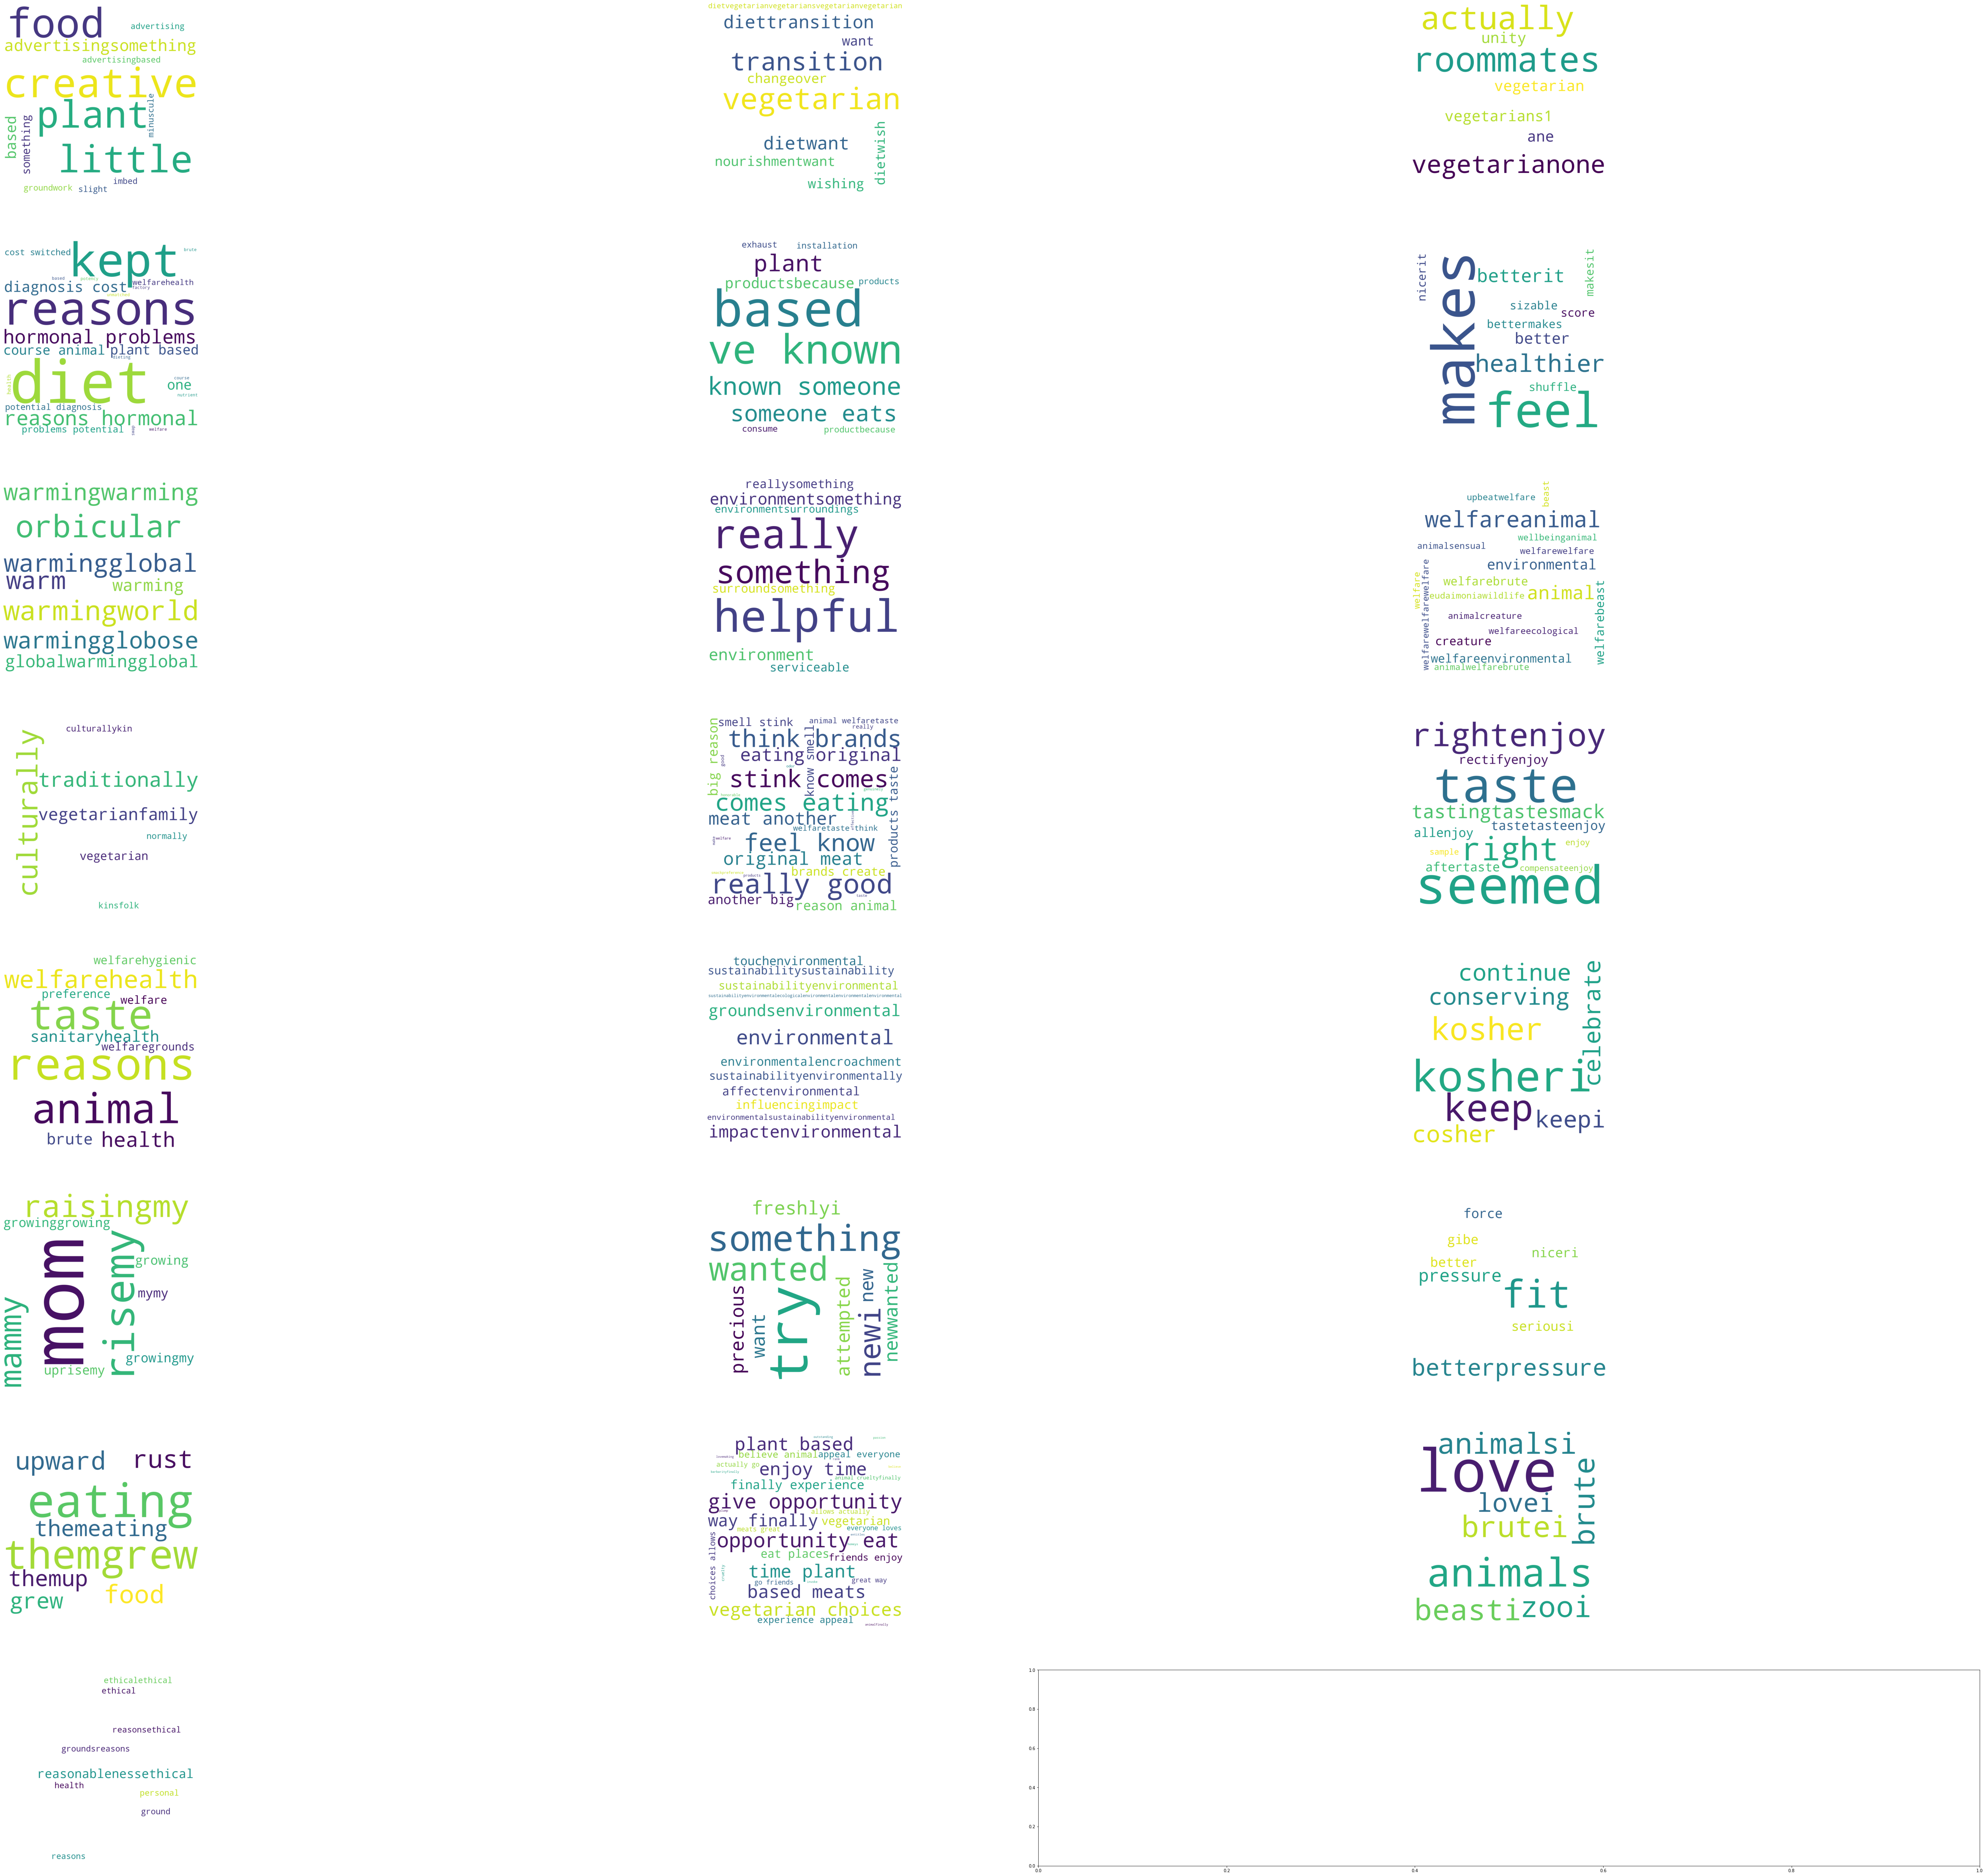

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(80,64))


for j in range(8): #j is number of rows
  for m in range(3): #m is number of columns
    plt.subplot(8,3,3*j+m+1)
    comment_words = ""
    if len(q_aug_dup[clusters.labels_==3*j+m]) != 0:
      for sentence in q_aug_dup[clusters.labels_==3*j+m]:
        comment_words += "".join(sentence)
      #
      wordcloud = WordCloud(width = 1000, height = 1000,
                  background_color ='white',
                  min_font_size = 12).generate(comment_words)


      plt.imshow(wordcloud)
      plt.axis("off")
      plt.tight_layout(pad = 10)
      #
    else:
      pass
    
    
plt.show()

#note that augmentation, must have introduced new neighbors(newly formed sentences by augmentation) around each original data.
There were 32 data points originally and with newly formed neighbours around, it is likely that each can be clutered with those neighbors. SO, with cost zero, I chose the hyperparameters which rsulted in the least number of clusters, that came out to be 23.

##I also experimented with the second best result which gave total clusters as 6. The result is below



In [ ]:
clusters_2nd_best = form_clusters(batch_ar,n_neighbors=15, n_components=5, min_cluster_size=10, random_state=42)

In [ ]:
for i in range(6):
  print("array for {}th cluster\n".format(i),q_aug_dup[clusters_2nd_best.labels_==i])

array for 0th cluster
 ['wishing transition vegetarian diet'
 'want transition vegetarian nourishment'
 'want transition vegetarian changeover diet' 'transition vegetarian diet'
 'transition want vegetarian diet' 'wish transition vegetarian diet'
 'want transition vegetarian diet'
 'kinsfolk culturally traditionally vegetarian'
 'family culturally normally vegetarian' 'family culturally vegetarian'
 'family vegetarian traditionally culturally'
 'kin culturally traditionally vegetarian'
 'family culturally traditionally vegetarian'
 'family culturally traditionally vegetarian' 'vegetarian' 'vegetarians'
 'vegetarian' 'vegetarian' 'ane roommates actually vegetarian'
 'one roommates actually vegetarians' '1 roommates actually vegetarian'
 'one roommates vegetarian' 'one actually roommates vegetarian'
 'one roommates unity actually vegetarian'
 'one roommates actually vegetarian']
array for 1th cluster
 ['environmental creature welfare' 'ecological animal welfare'
 'environmental animal we